In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pickle


In [2]:
with open ('df_10_08', 'rb') as fr:
    df_personality = pickle.load(fr)
    
    

In [3]:
df_personality.columns

Index(['reviewerID', 'asin', 'reviewText', 'overall', 'good', 'Comedy',
       'Art House & International', 'Drama', 'Action & Adventure', 'Horror',
       'Science Fiction', 'Animation', 'length', '!', '?', ',', '.', ' ',
       'Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
       'Extro_Art House & International', 'Extro_Drama',
       'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
       'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
       'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
       'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
       'Neuro_Art House & International', 'Neuro_Drama',
       'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
       'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
       'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
       'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
       'Consc_Art House & Inter

In [5]:
from sklearn.model_selection import train_test_split
predictors = ['Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
       'Extro_Art House & International', 'Extro_Drama',
       'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
       'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
       'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
       'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
       'Neuro_Art House & International', 'Neuro_Drama',
       'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
       'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
       'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
       'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
       'Consc_Art House & International', 'Consc_Drama',
       'Consc_Action & Adventure', 'Consc_Horror', 'Consc_Science Fiction',
       'Consc_Animation']

X = df_personality[predictors]
y =  df_personality['good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [6]:
#split dataset in features and target variable
feature_cols = ['Extro', 'Agree', 'Neuro', 'Open', 'Consc']

X = df_personality[feature_cols]
y =  df_personality['good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5984687367077839


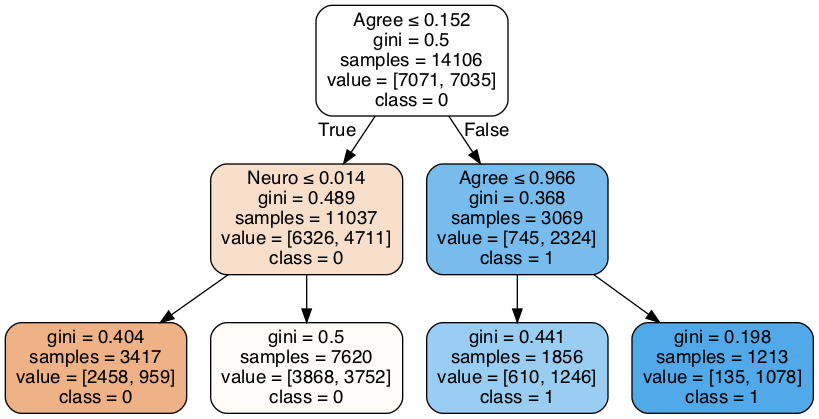

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('personalities.png')
Image(graph.create_png())


# Agreeableness

In [219]:
#High Agreeableness
len(df_personality[df_personality['Agree'] > 0.255])

4572

In [220]:
#low Agreeableness 
len(df_personality) - len(df_personality[df_personality['Agree'] >  0.255]) 

19756

In [221]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(df["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=df["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8218158622156071

In [222]:
import pickle
with open ('data_26_07_w_corpus', 'rb') as fr:
    df = pickle.load(fr)
    

In [223]:
df.head()

,reviewerID,asin,reviewText,overall,good,Comedy,Art House & International,Drama,Action & Adventure,Horror,...,Open_Science Fiction,Open_Animation,Consc_Comedy,Consc_Art House & International,Consc_Drama,Consc_Action & Adventure,Consc_Horror,Consc_Science Fiction,Consc_Animation,corpus
0,A19JYLHD94K94D,6304239327,Jan Svankajer's feature film follow up to his ...,5.0,1,0,1,1,0,0,...,0.0,0.0,-0.0,-0.244354,-0.244354,-0.0,-0.0,-0.0,-0.0,jan svankaj featur film follow masterpiec alic...
1,A144W50UYZG4YX,630339406X,Big-1988100mins/ColourTom HanksElizabeth Perki...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,big min colourtom hankselizabeth perkinsrobert...
2,A16QODENBJVUI1,B0007PALGG,Of all the films coming out this holiday movie...,4.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.000000,0.084057,0.0,0.0,0.0,0.0,film come holiday movi season kinsey near top ...
3,A3L2856DIMUXJY,B0001DCR0C,"As noted by a number of reviewers, this starte...",4.0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.466380,0.466380,0.0,0.0,0.0,0.0,note number review start life play director ma...
4,A1Z54EM24Y40LL,B00004WI5C,This is really a cute video. It's pretty long...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,realli cute video pretti long though may hard ...


## Low Agreeableness

In [224]:
low_agree = df[df['Agree'] < 0.432]

In [225]:
low_agree.head()

,reviewerID,asin,reviewText,overall,good,Comedy,Art House & International,Drama,Action & Adventure,Horror,...,Open_Science Fiction,Open_Animation,Consc_Comedy,Consc_Art House & International,Consc_Drama,Consc_Action & Adventure,Consc_Horror,Consc_Science Fiction,Consc_Animation,corpus
0,A19JYLHD94K94D,6304239327,Jan Svankajer's feature film follow up to his ...,5.0,1,0,1,1,0,0,...,0.0,0.0,-0.0,-0.244354,-0.244354,-0.0,-0.0,-0.0,-0.0,jan svankaj featur film follow masterpiec alic...
1,A144W50UYZG4YX,630339406X,Big-1988100mins/ColourTom HanksElizabeth Perki...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,big min colourtom hankselizabeth perkinsrobert...
2,A16QODENBJVUI1,B0007PALGG,Of all the films coming out this holiday movie...,4.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.000000,0.084057,0.0,0.0,0.0,0.0,film come holiday movi season kinsey near top ...
3,A3L2856DIMUXJY,B0001DCR0C,"As noted by a number of reviewers, this starte...",4.0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.466380,0.466380,0.0,0.0,0.0,0.0,note number review start life play director ma...
4,A1Z54EM24Y40LL,B00004WI5C,This is really a cute video. It's pretty long...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,realli cute video pretti long though may hard ...


In [226]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [227]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(low_agree["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=low_agree["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8106494152774322

In [228]:
print('People with low agreeableness write a negative review',round(len(low_agree[low_agree.good == 0])/len(low_agree) * 100), '% of the time and a positive review', round(len(low_agree[low_agree.good == 1])/len(low_agree) * 100), '% of the time.')# 


People with low agreeableness write a negative review 55 % of the time and a positive review 45 % of the time.


## Low Agreeableness

In [229]:
#high agreebleness

high_agree = df[df['Agree'] > 0.432]

In [230]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(high_agree["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=high_agree["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8538011695906432

In [231]:
print('People with high agreeableness write a negative review',round(len(high_agree[high_agree.good == 0])/len(high_agree) * 100), '% of the time and a positive review', round(len(high_agree[high_agree.good == 1])/len(high_agree) * 100), '% of the time.')# 


People with high agreeableness write a negative review 19 % of the time and a positive review 81 % of the time.


In [ ]:
#Neurtocism <= -0.003 - negative and  >= -0.003 for positive 

In [89]:
len(df[df['Neuro'] > -0.003])

13719

In [88]:
len(df[df['Neuro'] < -0.003])

5091

# Neuroticism

## high neuroticism

In [232]:
high_neuro = df[df['Neuro'] < -0.003]


In [233]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(high_neuro["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=high_neuro["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8413197172034564

In [234]:
print('People with high neuroticism write a negative review',round(len(high_neuro[high_neuro.good == 0])/len(high_neuro) * 100), '% of the time and a positive review', round(len(high_neuro[high_neuro.good == 1])/len(high_neuro) * 100), '% of the time.')# 


People with high neuroticism write a negative review 68 % of the time and a positive review 32 % of the time.


## low neuroticism

In [142]:
low_neuro = df[df['Neuro'] > -0.003]

cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(low_neuro["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=low_neuro["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.817201166180758

In [95]:
print('People with low neuroticism write a negative review',round(len(low_neuro[low_neuro.good == 0])/len(low_neuro) * 100), '% of the time and a positive review', round(len(low_neuro[low_neuro.good == 1])/len(low_neuro) * 100), '% of the time.')# 


People with low neuroticism write a negative review 44 % of the time and a positive review 56 % of the time.


# MODEL

In [173]:
df.head()

,reviewerID,asin,reviewText,overall,good,Comedy,Art House & International,Drama,Action & Adventure,Horror,...,Open_Animation,Consc_Comedy,Consc_Art House & International,Consc_Drama,Consc_Action & Adventure,Consc_Horror,Consc_Science Fiction,Consc_Animation,corpus,bow
0,A19JYLHD94K94D,6304239327,Jan Svankajer's feature film follow up to his ...,5.0,1,0,1,1,0,0,...,0.0,-0.0,-0.244354,-0.244354,-0.0,-0.0,-0.0,-0.0,jan svankaj featur film follow masterpiec alic...,"[0.0, 0.0, 0.0, 0.0, 0.10359055005125468, 0.0,..."
1,A144W50UYZG4YX,630339406X,Big-1988100mins/ColourTom HanksElizabeth Perki...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,big min colourtom hankselizabeth perkinsrobert...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.239..."
2,A16QODENBJVUI1,B0007PALGG,Of all the films coming out this holiday movie...,4.0,1,0,0,1,0,0,...,0.0,0.0,0.000000,0.084057,0.0,0.0,0.0,0.0,film come holiday movi season kinsey near top ...,"[0.0, 0.062349742970871765, 0.0, 0.0, 0.0, 0.0..."
3,A3L2856DIMUXJY,B0001DCR0C,"As noted by a number of reviewers, this starte...",4.0,1,0,1,1,0,0,...,0.0,0.0,0.466380,0.466380,0.0,0.0,0.0,0.0,note number review start life play director ma...,"[0.0, 0.0, 0.06473152608995265, 0.080281810844..."
4,A1Z54EM24Y40LL,B00004WI5C,This is really a cute video. It's pretty long...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,realli cute video pretti long though may hard ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [124]:
df.columns

Index(['reviewerID', 'asin', 'reviewText', 'overall', 'good', 'Comedy',
       'Art House & International', 'Drama', 'Action & Adventure', 'Horror',
       'Science Fiction', 'Animation', 'length', '!', '?', ',', '.', ' ',
       'Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
       'Extro_Art House & International', 'Extro_Drama',
       'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
       'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
       'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
       'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
       'Neuro_Art House & International', 'Neuro_Drama',
       'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
       'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
       'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
       'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
       'Consc_Art House & Inter

In [235]:
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import scipy as sp

# Create vectorizer for function to use
vectorizer = CountVectorizer(binary=True)
y = df["good"].values.astype(np.float32)

X = sp.sparse.hstack((vectorizer.fit_transform(df.reviewText),
                      df[['length', '!', '?', ',', '.', ' ',
       'Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
       'Extro_Art House & International', 'Extro_Drama',
       'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
       'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
       'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
       'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
       'Neuro_Art House & International', 'Neuro_Drama',
       'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
       'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
       'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
       'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
       'Consc_Art House & International', 'Consc_Drama',
       'Consc_Action & Adventure', 'Consc_Horror', 'Consc_Science Fiction',
       'Consc_Animation']].values),
                      format='csr')

tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(X).toarray()


X_columns = vectorizer.get_feature_names() + df[['length', '!', '?', ',', '.', ' ',
       'Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
       'Extro_Art House & International', 'Extro_Drama',
       'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
       'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
       'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
       'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
       'Neuro_Art House & International', 'Neuro_Drama',
       'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
       'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
       'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
       'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
       'Consc_Art House & International', 'Consc_Drama',
       'Consc_Action & Adventure', 'Consc_Horror', 'Consc_Science Fiction',
       'Consc_Animation']].columns.tolist()



In [236]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.12076099, 0.        ,
        0.        ],
       [0.        , 0.04648617, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [238]:
log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8641292791834999

In [211]:
### Repeat 30 times 


#dataframes_names = ["df1","df2","high_agree","low_agree","high_neuro","low_neuro"]

vectorizer = CountVectorizer(binary=True)
y = df["good"].values.astype(np.float32)

X = sp.sparse.hstack((vectorizer.fit_transform(df.reviewText),
                      df[['length', '!', '?', ',', '.', ' ',
           'Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
           'Extro_Art House & International', 'Extro_Drama',
           'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
           'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
           'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
           'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
           'Neuro_Art House & International', 'Neuro_Drama',
           'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
           'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
           'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
           'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
           'Consc_Art House & International', 'Consc_Drama',
           'Consc_Action & Adventure', 'Consc_Horror', 'Consc_Science Fiction',
           'Consc_Animation']].values),
                          format='csr')

X_columns = vectorizer.get_feature_names() + df[['length', '!', '?', ',', '.', ' ',
           'Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
           'Extro_Art House & International', 'Extro_Drama',
           'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
           'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
           'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
           'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
           'Neuro_Art House & International', 'Neuro_Drama',
           'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
           'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
           'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
           'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
           'Consc_Art House & International', 'Consc_Drama',
           'Consc_Action & Adventure', 'Consc_Horror', 'Consc_Science Fiction',
           'Consc_Animation']].columns.tolist()
    
acc=[]
    
for seed in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)
    log = LogisticRegression(solver='liblinear')#regularization is applied by default
    log.fit(X_train, y_train)
    accuracy=log.score(X_test,y_test)
    acc.append(accuracy)
print("Accuracy is ",sum(acc)/len(acc))
    


f   0.8601814444680699


In [214]:
sum(acc)/30

0.8601814444680699

In [195]:
n = len(df)
df1 = df.sample(int(n/2))

In [197]:
df2 = df[~df.isin(df1)].dropna()

In [ ]:
# Comparison

In [204]:
# df1 and df2 are random splits and df_H_O means High Openness, 
# df_L_O means low opennes etc, I split my median

dataframes = [df1,df2,high_agree,low_agree,high_neuro,low_neuro]
dataframes_names = ["df1","df2","high_agree","low_agree","high_neuro","low_neuro"]

for dfx, name in zip(dataframes,dataframes_names):
    cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
    XX = cv.fit_transform(dfx["corpus"]).toarray()
    # using relative word counts instead of absolute ones
    tfidf_transformer = TfidfTransformer()
    tfidf = tfidf_transformer.fit_transform(XX).toarray()
    X = tfidf
    y=dfx["good"]
    acc=[]
    for seed in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)
        log = LogisticRegression(solver='liblinear')#regularization is applied by default
        log.fit(X_train, y_train)
        accuracy=log.score(X_test,y_test)
        acc.append(accuracy)
    print(name," ",sum(acc)/len(acc), len(dfx))

df1   0.8195294784580498 9405
df2   0.8131377551020409 9405
high_agree   0.850828460038986 2734
low_agree   0.8090072157253049 16076
high_neuro   0.8207907829274681 5091
low_neuro   0.8152283770651114 13719
